# **XGBoost**

## **Librerías**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_columns = False

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [90]:
import xgboost as xgb

In [81]:
import shap

C:\Users\jmart\anaconda3\envs\StarterPack\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## **Datos**

In [21]:
base = pd.read_csv('../Datos/titanic.csv')

In [28]:
df = base.copy()

In [29]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [30]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [38]:
df_class = pd.get_dummies(df['Pclass']).reset_index()
df_sex = pd.get_dummies(df['Sex']).reset_index()
df_embarked = pd.get_dummies(df['Embarked']).reset_index()

In [49]:
df['Age'].fillna(int(df['Age'].mean()), inplace=True)

In [67]:
wf = pd.merge(df.reset_index(), df_class, how='left', left_on='index', right_on='index')
wf = pd.merge(wf, df_sex, how='left', left_on='index', right_on='index')
wf = pd.merge(wf, df_embarked, how='left', left_on='index', right_on='index')

In [68]:
wf.drop(['index', 'Sex', 'Embarked', 'Pclass'], axis=1, inplace=True)

In [72]:
wf.drop([3, 'male', 'S'], axis=1, inplace=True)

## **Modelo**

In [74]:
X = wf.drop(['Survived'], axis=1).copy()
y = wf[['Survived']]

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13, test_size=0.2)

In [96]:
model = xgb.XGBClassifier(random_state=13)

In [97]:
model.fit(X_train, y_train)

[23:51:27] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=13,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [98]:
y_pred = model.predict(X_test)

In [99]:
y_pred

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0], dtype=int64)

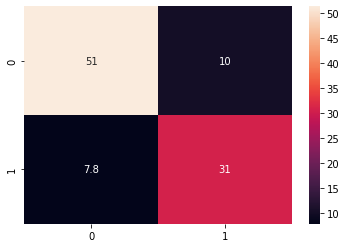

In [105]:
sns.heatmap(confusion_matrix(y_test, y_pred)/len(y_test)*100, annot=True)
plt.show()

In [107]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85       110
           1       0.75      0.80      0.77        69

    accuracy                           0.82       179
   macro avg       0.81      0.82      0.81       179
weighted avg       0.82      0.82      0.82       179

